# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span> - <span style="color:red"> Only for master students</span>


In quantum physics a **wave function**, $\Psi$, is a mathematical description of the state of a quantum system. The wave function is a complex-valued probability amplitude, and the probabilities for the possible results of measurements made on the system can be derived from it.

For now on, let's consider the simple case of a non-relativistic single particle, without spin, in three spatial dimensions. The state of such a particle is completely described by its wave function, $\Psi(\vec{r},t)$, where $\vec{r}$ is position and $t$ is time.

For one spinless particle, if the wave function is interpreted as a probability amplitude, the square modulus of the wave function, $|\Psi(\vec{r},t)|^2$, is interpreted as the probability density that the particle is at $\vec{r}$ at time $t$. Once we have a probability density, we can use Monte Carlo ...

#### Hydrogen atom
The wave functions of the eigenstates of an electron in a Hydrogen atom (this is the only atom for which the Schroedinger equation has been solved exactly) are expressed in terms of spherical harmonics and generalized Laguerre polynomials. It is convenient to use spherical coordinates, and the wave function can be separated into functions of each coordinate:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius, $L_{n-l-1}^{2l+1}$ are the generalized Laguerre polynomials of degree $n-l-1$, $n=1,2,...$ is the principal quantum number, $l=0,1, ..., n-1$ the azimuthal quantum number, $m=-l, -l+1, ..., l-1, l$ the magnetic quantum number.

For example, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
<span style="color:blue">Expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
</span>


### Exercise 05.1


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

<span style="color:red">Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- <span style="color:red">If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?</span>

You can use a Python code similar to the following one to observe how the sampled points distribute into the 3D space:

SONO UNO STUDENTE DELLA TRIENNALE

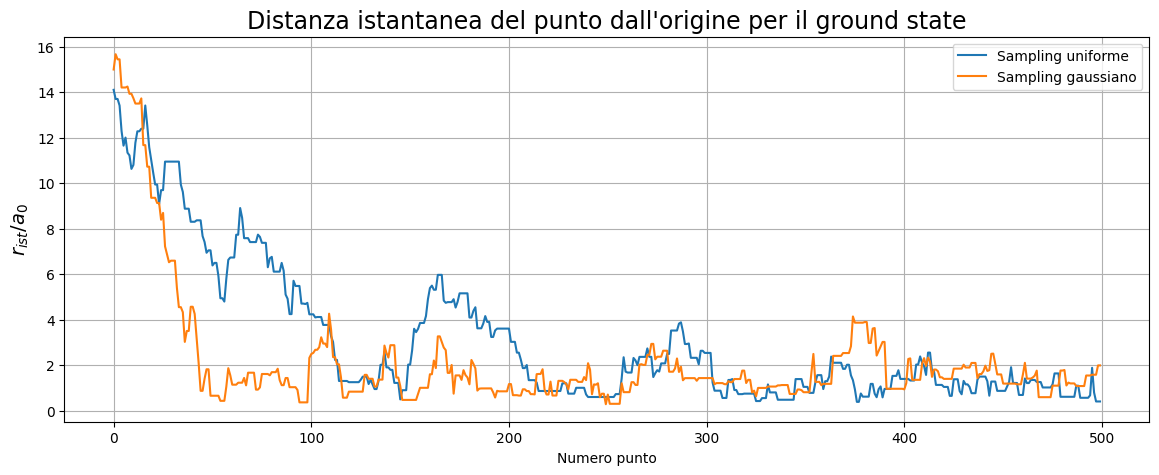

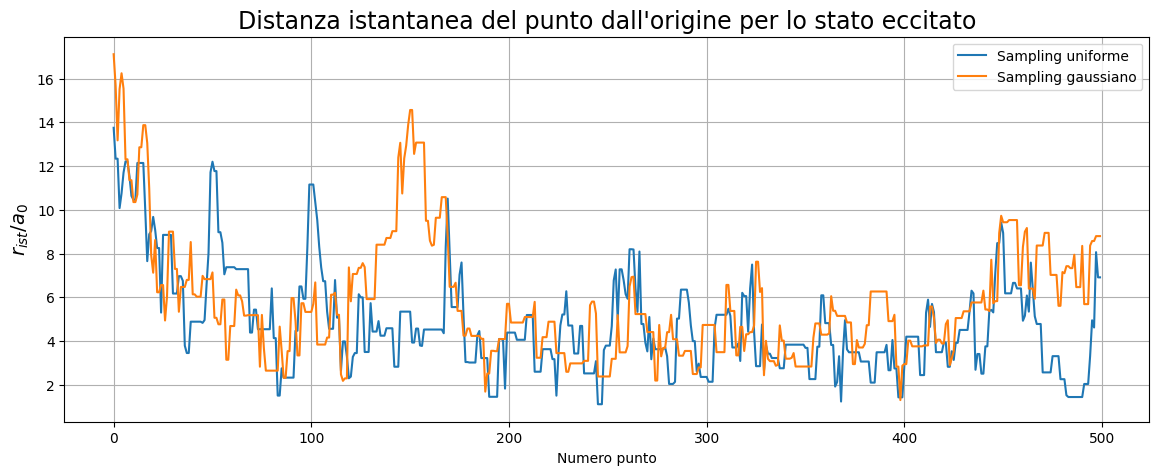

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Leggi i dati dai primi due file
filename1 = 'esercizio_5.1/OUTPUT/GS/uniform/sampling.dat'
filename2 = 'esercizio_5.1/OUTPUT/GS/gauss/sampling.dat'

# Supponiamo che i dati nei file siano separati da spazi
data1 = np.loadtxt(filename1)[:500]  # Leggi solo i primi 1000 punti
data2 = np.loadtxt(filename2)[:500]  # Leggi solo i primi 1000 punti

# Calcola la distanza r per ogni punto
r1 = np.sqrt(data1[:, 0]**2 + data1[:, 1]**2 + data1[:, 2]**2)
r2 = np.sqrt(data2[:, 0]**2 + data2[:, 1]**2 + data2[:, 2]**2)

# Plotta le distanze r per i primi due file
plt.figure(figsize=(14, 5))
plt.plot(r1, label='Sampling uniforme')
plt.plot(r2, label='Sampling gaussiano')
plt.xlabel('Numero punto')
plt.ylabel('$r_{ist}/a_0$', fontsize = 14)
plt.title('Distanza istantanea del punto dall\'origine per il ground state', fontsize = 17)
plt.legend()
plt.grid(True)
plt.show()

# Leggi i dati dagli altri due file
filename3 = 'esercizio_5.1/OUTPUT/ES/uniform/sampling.dat'
filename4 = 'esercizio_5.1/OUTPUT/ES/gauss/sampling.dat'

data3 = np.loadtxt(filename3)[:500]  # Leggi solo i primi 1000 punti
data4 = np.loadtxt(filename4)[:500]  # Leggi solo i primi 1000 punti

# Calcola la distanza r per ogni punto
r3 = np.sqrt(data3[:, 0]**2 + data3[:, 1]**2 + data3[:, 2]**2)
r4 = np.sqrt(data4[:, 0]**2 + data4[:, 1]**2 + data4[:, 2]**2)

# Plotta le distanze r per gli altri due file
plt.figure(figsize=(14, 5))
plt.plot(r3, label='Sampling uniforme')
plt.plot(r4, label='Sampling gaussiano')
plt.xlabel('Numero punto')
plt.ylabel('$r_{ist}/a_0$', fontsize = 14)
plt.title('Distanza istantanea del punto dall\'origine per lo stato eccitato', fontsize = 17)
plt.legend()
plt.grid(True)
plt.show()


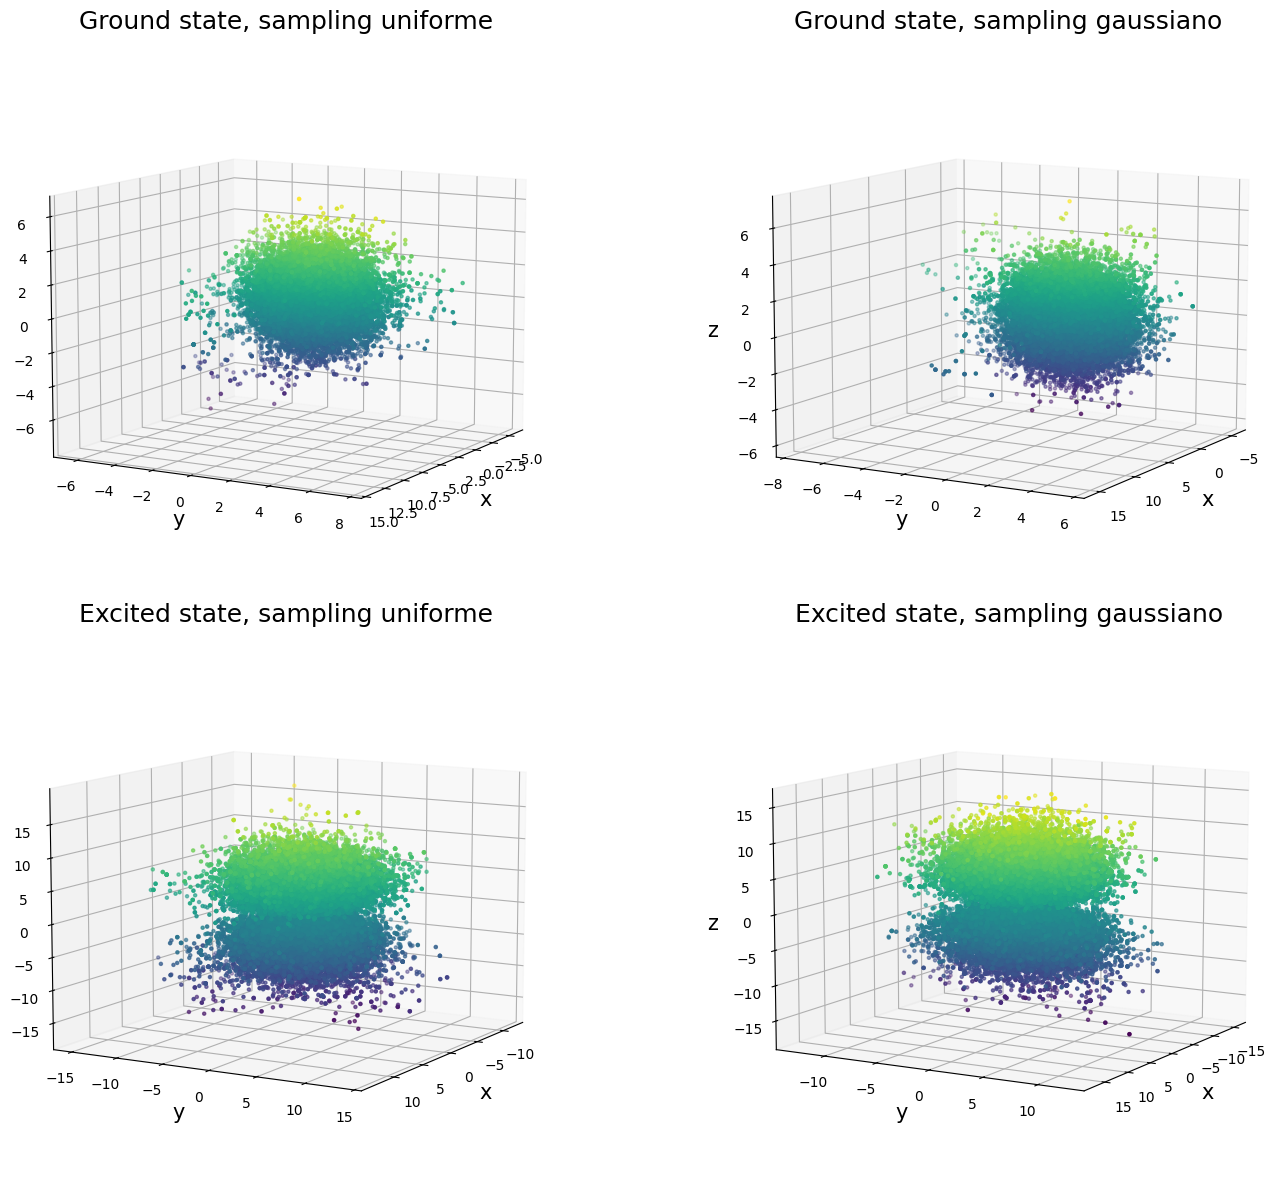

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Imposta il numero di punti da leggere
M = 500000

# Leggi i dati dai file
filename1 = 'esercizio_5.1/OUTPUT/GS/uniform/sampling.dat'
filename2 = 'esercizio_5.1/OUTPUT/GS/gauss/sampling.dat'
filename3 = 'esercizio_5.1/OUTPUT/ES/uniform/sampling.dat'
filename4 = 'esercizio_5.1/OUTPUT/ES/gauss/sampling.dat'

# Supponiamo che i dati nei file siano separati da spazi
data1 = np.loadtxt(filename1)[:M]
data2 = np.loadtxt(filename2)[:M]
data3 = np.loadtxt(filename3)[:M]
data4 = np.loadtxt(filename4)[:M]

# Estrai le coordinate x, y, z dai file
X1, Y1, Z1 = data1[:, 0], data1[:, 1], data1[:, 2]
X2, Y2, Z2 = data2[:, 0], data2[:, 1], data2[:, 2]
X3, Y3, Z3 = data3[:, 0], data3[:, 1], data3[:, 2]
X4, Y4, Z4 = data4[:, 0], data4[:, 1], data4[:, 2]

# Crea una figura e una griglia di sottotrame 2x2
fig, axs = plt.subplots(2, 2, subplot_kw={'projection': '3d'}, figsize=(16, 12))

# Dimensioni dei caratteri
label_size = 15
title_size = 18

# Funzione per impostare i titoli manualmente
def set_custom_title(ax, title, x, y, z):
    ax.text2D(x, y, title, transform=ax.transAxes, fontsize=title_size, ha='center')

# Plotta il primo set di punti
axs[0, 0].scatter(X1, Y1, Z1, c=Z1, marker='.')
axs[0, 0].set_xlabel('x', fontsize=label_size)
axs[0, 0].set_ylabel('y', fontsize=label_size)
axs[0, 0].set_zlabel('z', fontsize=label_size)
axs[0, 0].view_init(10, 30)
set_custom_title(axs[0, 0], 'Ground state, sampling uniforme', 0.5, 1.05, 0)

# Plotta il secondo set di punti
axs[0, 1].scatter(X2, Y2, Z2, c=Z2, marker='.')
axs[0, 1].set_xlabel('x', fontsize=label_size)
axs[0, 1].set_ylabel('y', fontsize=label_size)
axs[0, 1].set_zlabel('z', fontsize=label_size)
axs[0, 1].view_init(10, 30)
set_custom_title(axs[0, 1], 'Ground state, sampling gaussiano', 0.5, 1.05, 0)

# Plotta il terzo set di punti
axs[1, 0].scatter(X3, Y3, Z3, c=Z3, marker='.')
axs[1, 0].set_xlabel('x', fontsize=label_size)
axs[1, 0].set_ylabel('y', fontsize=label_size)
axs[1, 0].set_zlabel('z', fontsize=label_size)
axs[1, 0].view_init(10, 30)
set_custom_title(axs[1, 0], 'Excited state, sampling uniforme', 0.5, 1.05, 0)

# Plotta il quarto set di punti
axs[1, 1].scatter(X4, Y4, Z4, c=Z4, marker='.')
axs[1, 1].set_xlabel('x', fontsize=label_size)
axs[1, 1].set_ylabel('y', fontsize=label_size)
axs[1, 1].set_zlabel('z', fontsize=label_size)
axs[1, 1].view_init(10, 30)
set_custom_title(axs[1, 1], 'Excited state, sampling gaussiano', 0.5, 1.05, 0)

# Mostra il grafico
plt.tight_layout()
plt.show()


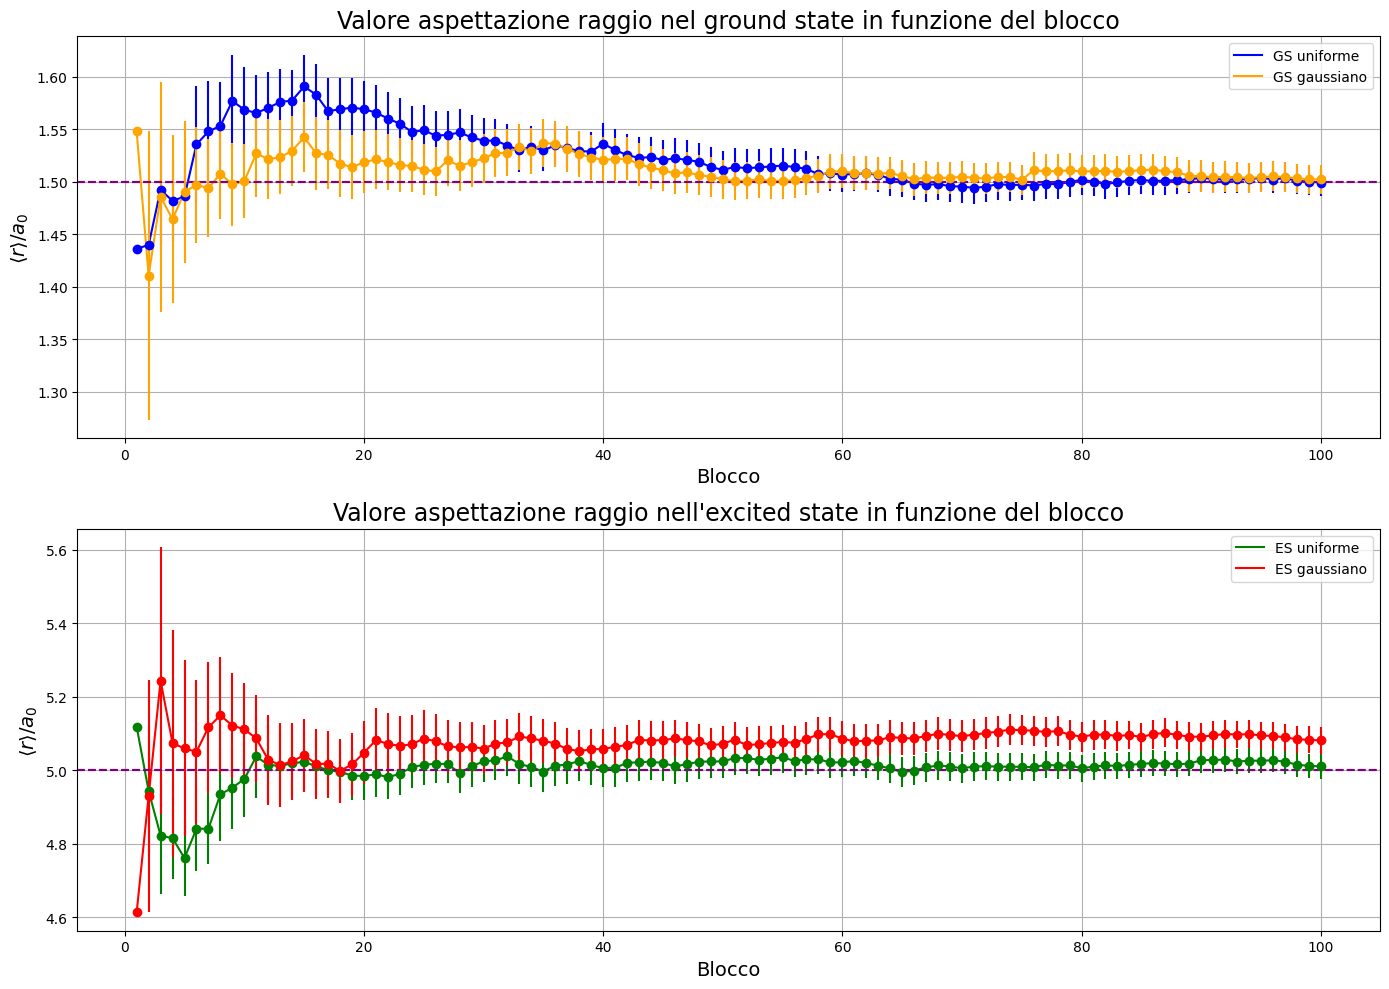

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Leggi i dati dai file
filenames = [
    'esercizio_5.1/OUTPUT/GS/uniform/expr.dat',
    'esercizio_5.1/OUTPUT/GS/gauss/expr.dat',
    'esercizio_5.1/OUTPUT/ES/uniform/expr.dat',
    'esercizio_5.1/OUTPUT/ES/gauss/expr.dat'
]

# Creazione dei grafici
fig, axs = plt.subplots(2, 1, figsize=(14, 10))

# Etichette e colori per le curve
labels = ['GS uniforme', 'GS gaussiano', 'ES uniforme', 'ES gaussiano']
colors = ['blue', 'orange', 'green', 'red']

for i, filename in enumerate(filenames):
    # Carica dati dal file
    data = np.loadtxt(filename)
    
    # Estrai le prime due colonne
    x, y = data[:, 0], data[:, 1]
    
    # Plot dei dati
    ax_index = 0 if i < 2 else 1
    axs[ax_index].plot(range(1, len(x) + 1), x, label=labels[i], color=colors[i])
    axs[ax_index].errorbar(range(1, len(y) + 1), x, yerr=y, fmt='o', color=colors[i])

    # Aggiungi la retta orizzontale y = 1.5 al primo plot
    if ax_index == 0:
        axs[ax_index].axhline(y=1.5, color='purple', linestyle='--')

    # Aggiungi la retta orizzontale y = 3 al secondo plot
    else:
        axs[ax_index].axhline(y=5, color='purple', linestyle='--')

# Impostazioni grafiche
for ax in axs:
    ax.set_xlabel('Blocco', fontsize=14)
    ax.set_ylabel(r'$\langle r \rangle/a_0$', fontsize=14)
    ax.legend()
    ax.grid()

# Aggiungi i titoli per i due plot
axs[0].set_title('Valore aspettazione raggio nel ground state in funzione del blocco', fontsize=17)
axs[1].set_title('Valore aspettazione raggio nell\'excited state in funzione del blocco', fontsize=17)

plt.tight_layout()
plt.show()
